In [1]:
!gdown --id 1rkjNBPWA0kIquX3GfF8yTYs7kGSeaQH0

Downloading...
From: https://drive.google.com/uc?id=1rkjNBPWA0kIquX3GfF8yTYs7kGSeaQH0
To: /content/facial-keypoints-detection.zip
80.0MB [00:00, 82.8MB/s]


In [4]:
!mkdir data

In [7]:
!unzip /content/facial-keypoints-detection.zip -d data

Archive:  /content/facial-keypoints-detection.zip
  inflating: data/IdLookupTable.csv  
  inflating: data/SampleSubmission.csv  
  inflating: data/test.zip           
  inflating: data/training.zip       


In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/data/SampleSubmission.csv
/content/data/training.zip
/content/data/IdLookupTable.csv
/content/data/test.zip


In [9]:
!unzip -u /content/data/test.zip
!unzip -u /content/data/training.zip

Archive:  /content/data/test.zip
  inflating: test.csv                
Archive:  /content/data/training.zip
  inflating: training.csv            


In [11]:
train_file = 'training.csv'
test_file = 'test.csv'
lookup_file = '/content/data/IdLookupTable.csv'
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
lookup = pd.read_csv(lookup_file)


In [12]:
train.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [13]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [14]:
lookup.head().T

,0,1,2,3,4
RowId,1,2,3,4,5
ImageId,1,1,1,1,1
FeatureName,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x
Location,NaN,NaN,NaN,NaN,NaN


In [15]:
train.isnull().any().value_counts()#

True     28
False     3
dtype: int64

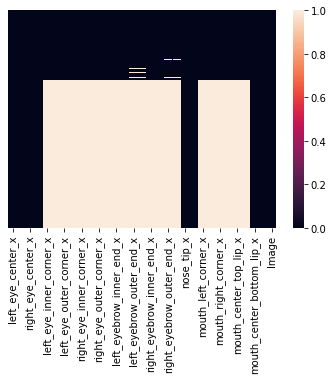

In [16]:
sns.heatmap(train.isnull(),yticklabels = False, cbar ='BuPu')

In [17]:
train.fillna(method = 'ffill',inplace = True)
train.isnull().any().value_counts()
train.shape


(7049, 31)

In [188]:
def process_img(data):
    images = []
    for idx, sample in data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    return images



In [189]:
def keypoints(data):
    keypoint = data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features


In [190]:
y_test = test.Image
#y_test.head()

In [191]:
#len(train['Image'][1])

In [192]:
X_train.shape

(7049, 96, 96, 1)

In [193]:
X_train = process_img(train)
y_train = keypoints(train)

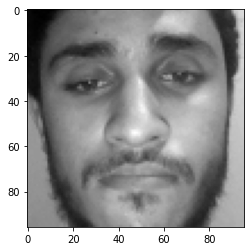

In [196]:
plt.imshow(image.reshape(96,96),cmap='gray')
plt.show()

# **Modeling**

In [24]:
import tensorflow as tf
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Conv2D,MaxPool2D, ZeroPadding2D
from keras.models import Sequential, Model

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

In [25]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30))

model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae', 'acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)       

**Fit the model!**

In [33]:
model.fit(X_train,y_train,epochs = 40,batch_size = 256,validation_split = 0.2)

Epoch 1/40
23/23 [==============================] - 3s 132ms/step - loss: 30.5164 - mae: 4.1715 - acc: 0.5242 - val_loss: 37.8570 - val_mae: 5.5751 - val_acc: 0.7078
Epoch 2/40
23/23 [==============================] - 3s 129ms/step - loss: 32.1676 - mae: 4.2759 - acc: 0.5274 - val_loss: 4.5814 - val_mae: 1.3508 - val_acc: 0.7121
Epoch 3/40
23/23 [==============================] - 3s 129ms/step - loss: 29.3579 - mae: 4.0686 - acc: 0.5121 - val_loss: 4.9786 - val_mae: 1.3810 - val_acc: 0.7305
Epoch 4/40
23/23 [==============================] - 3s 129ms/step - loss: 30.2886 - mae: 4.1498 - acc: 0.5187 - val_loss: 5.4794 - val_mae: 1.5812 - val_acc: 0.7177
Epoch 5/40
23/23 [==============================] - 3s 129ms/step - loss: 28.0717 - mae: 3.9808 - acc: 0.5529 - val_loss: 4.6793 - val_mae: 1.3259 - val_acc: 0.7397
Epoch 6/40
23/23 [==============================] - 3s 129ms/step - loss: 28.1336 - mae: 3.9942 - acc: 0.5453 - val_loss: 6.0181 - val_mae: 1.7675 - val_acc: 0.7277
Epoch 7/4

In [34]:
X_train

array([[[[0.93333333],
         [0.9254902 ],
         [0.92941176],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.92156863],
         [0.93333333],
         [0.9254902 ],
         ...,
         [0.97647059],
         [0.98039216],
         [0.98431373]],

        [[0.92941176],
         [0.9254902 ],
         [0.92941176],
         ...,
         [0.98431373],
         [0.98431373],
         [0.98039216]],

        ...,

        [[0.72941176],
         [0.71764706],
         [0.70980392],
         ...,
         [0.20392157],
         [0.22352941],
         [0.23529412]],

        [[0.74117647],
         [0.7372549 ],
         [0.81176471],
         ...,
         [0.23921569],
         [0.27058824],
         [0.30588235]],

        [[0.74901961],
         [0.72156863],
         [0.72156863],
         ...,
         [0.2745098 ],
         [0.29411765],
         [0.35294118]]],


       [[[0.85882353],
         [0.84313725],
         [0.8 

In [215]:
X_train = process_img(train)
y_test = process_img(test)

In [216]:
y_list = list(y_test)

In [217]:
y_list.append(image)

In [218]:
yy = np.array(y_list)
images = np.array(yy)/255.
y_test = images
y_test.shape

(1784, 96, 96, 1)

In [203]:
preds = model.predict(y_test)
print(preds)

[[65.35017  35.554276 28.559128 ... 68.135956 45.99967  82.149216]
 [65.03325  35.87982  28.103146 ... 72.714035 47.048126 82.7405  ]
 [65.26722  35.83922  29.044052 ... 71.68976  48.425114 81.959915]
 ...
 [62.74259  36.557602 28.942173 ... 73.055984 45.714405 74.460106]
 [64.202835 36.99888  28.983871 ... 74.964935 46.83648  76.94611 ]
 [63.00721  33.2494   27.770988 ... 67.643295 46.947025 74.26809 ]]


In [204]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)

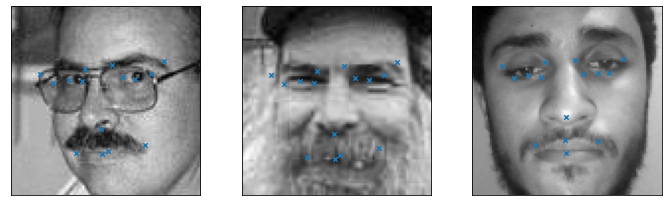

In [206]:
fig = plt.figure(figsize=(20,16))
for i in range(1,4):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(yy[1780+i], preds[1780+i], axis, "")
plt.show()

In [39]:
lookup.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [40]:
print(preds[0][1])

35.554276


In [41]:
feature = list(lookup['FeatureName'])
image_ids = list(lookup['ImageId']-1)
row_ids = lookup['RowId']
pre_list = list(preds)

feature_list = []
for f in feature:
    feature_list.append(feature.index(f))
 
final_preds = []
for x,y in zip(image_ids, feature_list):
    final_preds.append(pre_list[x][y])
    
row_ids = pd.Series(row_ids, name = 'RowId')
locations = pd.Series(final_preds, name = 'Location')
locations = locations.clip(0.0,96.0)
submission_result = pd.concat([row_ids,locations],axis = 1)
submission_result.to_csv('submission.csv',index = False)
submission_result

,RowId,Location
0,1,65.350166
1,2,35.554276
2,3,28.559128
3,4,34.305241
4,5,58.760437
...,...,...
27119,27120,37.413570
27120,27121,46.368450
27121,27122,64.126129
27122,27123,46.836479


In [264]:
# img_path = '/content/photo_2021-07-04_14-35-50.jpg'
# img_path_2 = '/content/geeks.jpg'

In [263]:
# import dlib
# from PIL import Image
# from skimage import io
# import matplotlib.pyplot as plt


# def detect_faces(image):

#     # Create a face detector
#     face_detector = dlib.get_frontal_face_detector()

#     # Run detector and get bounding boxes of the faces on image.
#     detected_faces = face_detector(image, 1)
#     face_frames = [(x.left(), x.top(),
#                     x.right(), x.bottom()) for x in detected_faces]

#     return face_frames

# # Load image
# image = io.imread(img_path)

# # Detect faces
# detected_faces = detect_faces(image)

# # Crop faces and plot
# for n, face_rect in enumerate(detected_faces):
#     face = Image.fromarray(image).crop(face_rect)
#     a = face.save("gabry.jpg")
#     plt.subplot(1, len(detected_faces), n+1)
#     plt.axis('off')
#     plt.imshow(face)
    

Original Dimensions :  (462, 462)
Resized Dimensions :  (96, 96, 1)


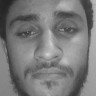

In [210]:
# import cv2
 
# img = cv2.imread('/content/gabry.jpg', 0)
 
# print('Original Dimensions : ',img.shape)
 
# width = 96
# height = 96
# dim = (width, height)
 
# # resize image
# resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

# image = np.reshape(resized, (96,96,1))
# print('Resized Dimensions : ',image.shape)

# from google.colab.patches import cv2_imshow

# cv2_imshow(image)

In [220]:
# #processing 
# test_image = np.array(image)
# images_2 = np.array(test_image)/255.
# tt = np.expand_dims(images_2, axis=0)

# y_test = tt
# y_test.shape
# preds = model.predict(y_test)
# print(preds)

[[63.007202 33.249393 27.770983 34.363873 55.4898   33.933994 68.838005
  33.29153  34.418594 35.284134 20.664345 35.79637  51.677094 26.846611
  75.66898  26.261364 36.46924  28.039366 14.266323 29.931097 46.839752
  55.77472  63.17661  68.02147  31.369402 70.193306 46.58137  67.643295
  46.94702  74.26808 ]]


In [225]:
# test_image.shape

(96, 96, 1)

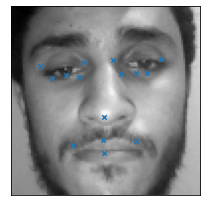

In [227]:
# fig = plt.figure(figsize=(20,16))
# for i in range(0,1):
#     axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
#     plot_sample(test_image, preds[0], axis, "")
# plt.show()

In [236]:
# mouth_center_up_lip_y	 = preds[0][27]
# print(f'mouth_center_up_lip_y {mouth_center_up_lip_y}')
# mouth_center_bottom_lip_y	 = preds[0][29]
# print(f'mouth_center_bottom_lip_y {mouth_center_bottom_lip_y}')


mouth_center_up_lip_y 67.64329528808594
mouth_center_bottom_lip_y 74.26808166503906


In [246]:
def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

In [247]:
import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt

def Face_detection(img_path):
    # Load image
    image = io.imread(img_path)
    # Detect faces
    detected_faces = detect_faces(image)

    # Crop faces and plot
    for n, face_rect in enumerate(detected_faces):
        face = Image.fromarray(image).crop(face_rect)
      
    return face

In [260]:
def Rrturn_mouth_top_bootom(path):
  #img = cv2.imread(path, 0) 
  img = Face_detection(path)
  img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
  width = 96
  height = 96
  dim = (width, height)
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  image = np.reshape(resized, (96,96,1))
  test_image = np.array(image)
  test_image = np.array(test_image)/255.
  y_test = np.expand_dims(test_image, axis=0)
  preds = model.predict(y_test)
  mouth_center_Tob_lip_y	 = preds[0][27]
  mouth_center_bottom_lip_y	 = preds[0][29]

  return mouth_center_Tob_lip_y,mouth_center_bottom_lip_y,image,preds

mouth_center_Tob_lip_y 67.6515884399414
mouth_center_bottom_lip_y 74.25972747802734


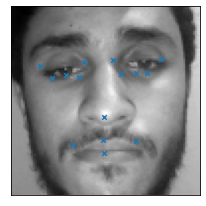

In [261]:
# This image Has Close Mouse
mouth_center_Tob_lip_y,mouth_center_bottom_lip_y,image,preds = Rrturn_mouth_top_bootom('/content/photo_2021-07-04_14-35-50.jpg')
print(f'mouth_center_Tob_lip_y {mouth_center_Tob_lip_y}')
print(f'mouth_center_bottom_lip_y {mouth_center_bottom_lip_y}')

fig = plt.figure(figsize=(20,16))
for i in range(0,1):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(image, preds[0], axis, "")
plt.show()

mouth_center_Tob_lip_y 67.32794189453125
mouth_center_bottom_lip_y 74.18318176269531


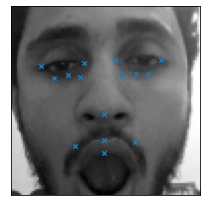

In [262]:
# This Image Has Open Mouse
mouth_center_Tob_lip_y,mouth_center_bottom_lip_y,image,preds = Rrturn_mouth_top_bootom('/content/photo_2021-07-04_18-48-49.jpg')
print(f'mouth_center_Tob_lip_y {mouth_center_Tob_lip_y}')
print(f'mouth_center_bottom_lip_y {mouth_center_bottom_lip_y}')
fig = plt.figure(figsize=(20,16))
for i in range(0,1):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(image, preds[0], axis, "")
plt.show()

In [273]:
# This Image Has Open Mouse
try:
    mouth_center_Tob_lip_y,mouth_center_bottom_lip_y,image,preds = Rrturn_mouth_top_bootom('/content/photo_2021-07-04_20-08-13.jpg')
    print(f'mouth_center_Tob_lip_y {mouth_center_Tob_lip_y}')
    print(f'mouth_center_bottom_lip_y {mouth_center_bottom_lip_y}')
    fig = plt.figure(figsize=(20,16))
    for i in range(0,1):
        axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
        plot_sample(image, preds[0], axis, "")
    plt.show()
except:
  print('There is no face in the scene so go DOWN')

There is no face in the scene so go DOWN
